In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

In [4]:
from scipy.optimize import minimize

In [5]:
def f(x):
    return np.exp(1. / (2. + np.sin(x) * np.cos(4 * x)))

In [6]:
L = 5


# Question 1

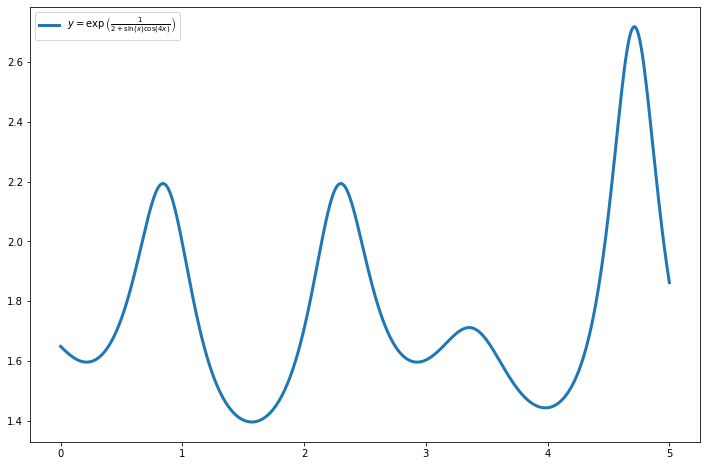

In [7]:
x_aff = np.linspace(0, L, 500)
y_aff = f(x_aff)

fig, rep = plt.subplots()
rep.plot(
    x_aff, 
    y_aff, 
    linewidth=3., 
    label=r"$y=\exp\left(\frac{1}{2+\sin(x)\cos(4x)}\right)$"
)
rep.legend()

# Question 2

In [8]:
N = 10
sigma = 0.1

In [9]:
x = np.random.uniform(low=0, high=L, size=(N,)) 
x

array([4.4948109 , 1.91609751, 4.11651585, 2.54522059, 2.98300105,
       0.98374127, 0.99052317, 0.59125626, 1.42994346, 1.41338595])

In [10]:
y = f(x)
y

array([2.07425568, 1.58292959, 1.46883218, 1.87456992, 1.60015582,
       2.02631311, 2.01258573, 1.86650487, 1.42258679, 1.42956002])

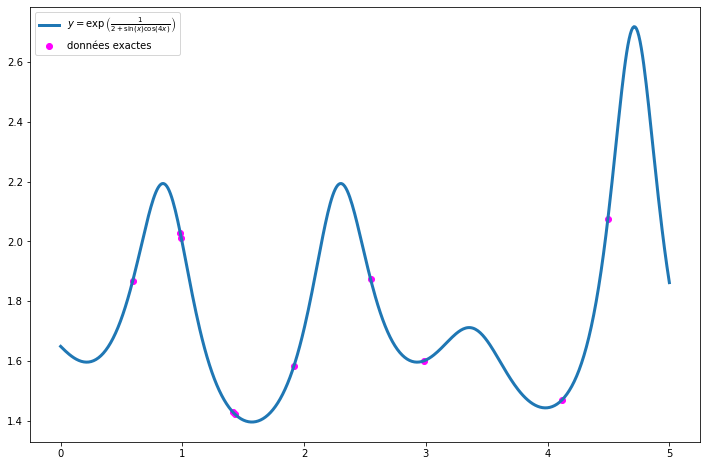

In [11]:
rep.scatter(x, y, label="données exactes", color="magenta")
rep.legend()
fig

In [12]:
p = y + np.random.normal(loc=0., scale=sigma, size=y.size)
p

array([1.77537791, 1.60981722, 1.38705144, 1.89514047, 1.65007133,
       2.05224188, 1.88772083, 1.84254718, 1.4116733 , 1.30168348])

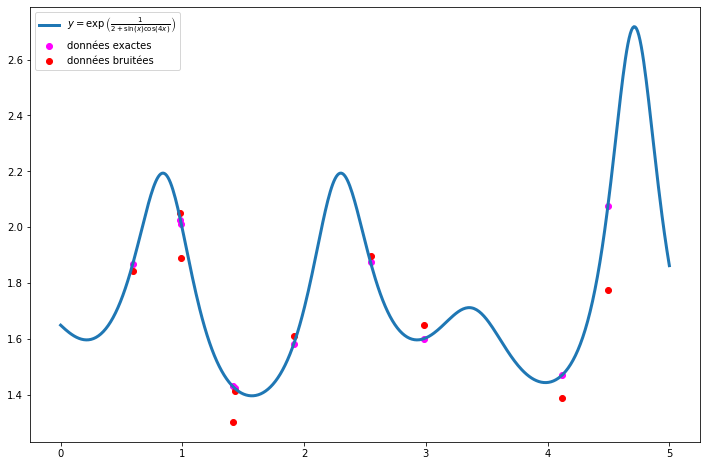

In [13]:
rep.scatter(x, p, color="red", label="données bruitées")
rep.legend()
fig

# Question 3

In [14]:
def erreur(parametres):
    a, b = parametres
    return np.sum((a * x + b - p) ** 2) / N
    

In [15]:
resultat = minimize(fun=erreur, x0=np.array([0, 0]))
resultat

      fun: 0.05376874309631685
 hess_inv: array([[ 0.30059067, -0.64281735],
       [-0.64281735,  1.87280633]])
      jac: array([2.70083547e-08, 1.29127875e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-0.04447909,  1.77680527])

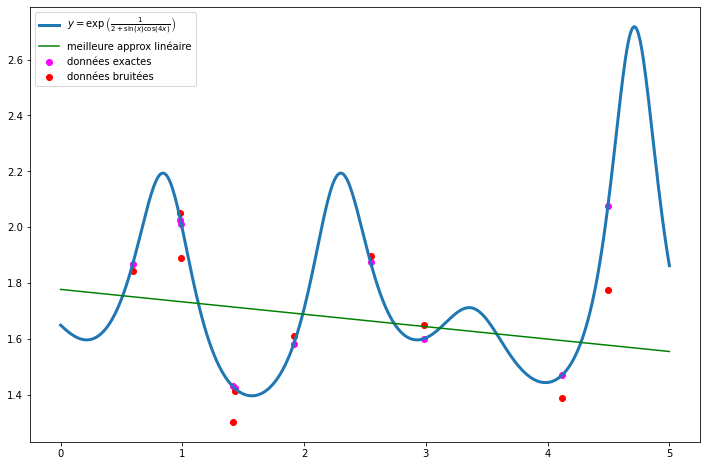

In [16]:
a, b = resultat.x
rep.plot(
    x_aff, 
    a * x_aff + b, 
    color="green", 
    label="meilleure approx linéaire"
)
rep.legend()
fig